# General Usage
## Training start

1) Run the first cell, when its done click "RESTART RUNTIME"

2) Run the second cell

3) Run the last cell to execute


- If you go over in GPU you can restart the runtime and then do steps 2 and three above.


## Drive Mount + Git Pull Push

In [13]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/Shareddrives/EECS\ 442\ -\ Project/eecs442-proj
!pip install -r requirements.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/Shareddrives/EECS 442 - Project/eecs442-proj'
/content/drive/Shareddrives/EECS 442 - Project/eecs442-proj


In [6]:
%cd drive/Shareddrives/EECS\ 442\ -\ Project/eecs442-proj
%load_ext autoreload
%autoreload 2

[Errno 2] No such file or directory: 'drive/Shareddrives/EECS 442 - Project/eecs442-proj'
/content/drive/Shareddrives/EECS 442 - Project/eecs442-proj
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
#!git config --global user.email "wzahm@umich.edu"
#!git config --global user.name "Wyler Zahm"
#!git status
#!git checkout model_pipeline.py train_model.py
#!git pull
!git add Executor.ipynb config.json model_pipeline.py utils.py train_model.py basemodel_train_hist.txt models
!git commit -m "more gpu training stuff"
!git push
#!git add Executor.ipynb model_pipeline.py train_model.py
#!git commit -m "small changes"

[autoreload of model_pipeline failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ModuleNotFoundError: No module named 'pytorch_msssim'
]


^C
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
	modified:   Executor.ipynb
	modified:   config.json
	modified:   model_pipeline.py
	modified:   train_model.py
	modified:   utils.py

Untracked files:
	00019_00183_indoors_000_010.png
	__pycache__/
	basemodel_train_hist.txt
	densenet169-b2777c0a.pth
	diode/val.tar.gz
	main.txt
	model_checkpoints/
	models/__pycache__/
	models/basemodel_save_0.pt
	models/basemodel_save_12.pt
	models/basemodel_save_16.pt
	models/basemodel_save_20.pt
	models/basemodel_save_24.pt
	models/basemodel_save_28.pt
	models/basemodel_save_32.pt
	models/basemodel_save_36.pt
	models/basemodel_save_4.pt
	models/basemodel_save_8.pt

no changes added to commit
Everything up-to-date


## Data Downloading

In [ ]:
%cd diode
!wget http://diode-dataset.s3.amazonaws.com/val.tar.gz
!tar -zxvf val.tar.gz
%cd ..

!wget https://download.pytorch.org/models/densenet169-b2777c0a.pth

Uninstalling matplotlib-3.1.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.1.3
  Using cached https://files.pythonhosted.org/packages/ce/63/74c0b6184b6b169b121bb72458818ee60a7d7c436d7b1907bd5874188c55/matplotlib-3.4.1-cp37-cp37m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


## Model Exection

Using GPU.
Batch size: 4
Epochs: 60


  0%|          | 0/107 [00:00<?, ?it/s]

Model sent to GPU

Training and Evaluating Basemodel with: 	LR = 0.0001	WD = 0

Epoch #0


100%|██████████| 23/23 [00:15<00:00,  1.51it/s]


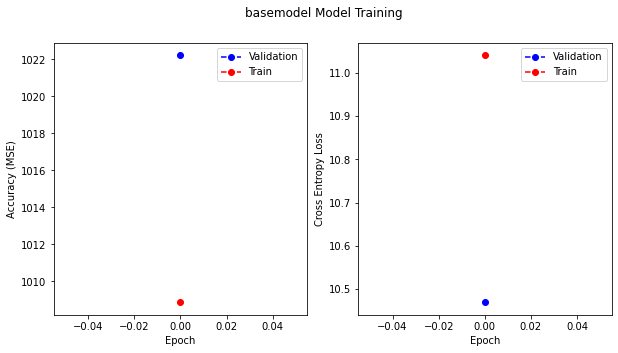

Saving model state and plots.


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(1008.8656)	tensor(11.0408, grad_fn=<DivBackward0>)	tensor(1022.2198)	tensor(10.4687)

Epoch #1


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(961.5135)	tensor(9.8397, grad_fn=<DivBackward0>)	tensor(800.7632)	tensor(10.0079)

Epoch #2


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(888.2449)	tensor(9.8572, grad_fn=<DivBackward0>)	tensor(781.6472)	tensor(11.2480)

Epoch #3


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(866.8698)	tensor(9.5462, grad_fn=<DivBackward0>)	tensor(774.5133)	tensor(10.1695)

Epoch #4


100%|██████████| 23/23 [00:13<00:00,  1.70it/s]


Saving model state and plots.


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(852.7536)	tensor(9.8195, grad_fn=<DivBackward0>)	tensor(766.9215)	tensor(10.1763)

Epoch #5


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(831.7190)	tensor(9.5478, grad_fn=<DivBackward0>)	tensor(827.4788)	tensor(9.9795)

Epoch #6


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(818.7406)	tensor(9.4587, grad_fn=<DivBackward0>)	tensor(782.3179)	tensor(10.1257)

Epoch #7


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(813.4315)	tensor(9.3446, grad_fn=<DivBackward0>)	tensor(751.1897)	tensor(9.8669)

Epoch #8


100%|██████████| 23/23 [00:13<00:00,  1.70it/s]


Saving model state and plots.


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(794.2927)	tensor(9.2648, grad_fn=<DivBackward0>)	tensor(704.2145)	tensor(9.6652)

Epoch #9


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(763.1083)	tensor(9.2211, grad_fn=<DivBackward0>)	tensor(717.4504)	tensor(9.7412)

Epoch #10


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(756.4770)	tensor(9.1596, grad_fn=<DivBackward0>)	tensor(685.0948)	tensor(9.6787)

Epoch #11


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(769.7872)	tensor(9.1751, grad_fn=<DivBackward0>)	tensor(812.8622)	tensor(9.7114)

Epoch #12


100%|██████████| 23/23 [00:13<00:00,  1.70it/s]


Saving model state and plots.


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(764.5150)	tensor(9.1360, grad_fn=<DivBackward0>)	tensor(700.9233)	tensor(9.5385)

Epoch #13


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(728.0817)	tensor(9.0747, grad_fn=<DivBackward0>)	tensor(673.4811)	tensor(9.5483)

Epoch #14


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(731.3317)	tensor(9.1225, grad_fn=<DivBackward0>)	tensor(692.5500)	tensor(9.6711)

Epoch #15


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(726.5970)	tensor(9.1050, grad_fn=<DivBackward0>)	tensor(717.7104)	tensor(9.5164)

Epoch #16


100%|██████████| 23/23 [00:13<00:00,  1.70it/s]


Saving model state and plots.


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(714.3009)	tensor(8.9941, grad_fn=<DivBackward0>)	tensor(653.1618)	tensor(9.5158)

Epoch #17


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(693.2576)	tensor(8.9806, grad_fn=<DivBackward0>)	tensor(631.3627)	tensor(9.4225)

Epoch #18


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(712.7419)	tensor(8.9759, grad_fn=<DivBackward0>)	tensor(625.6630)	tensor(9.4522)

Epoch #19


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(680.7222)	tensor(8.9015, grad_fn=<DivBackward0>)	tensor(657.8633)	tensor(9.3823)

Epoch #20


100%|██████████| 23/23 [00:13<00:00,  1.70it/s]


Saving model state and plots.


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(688.6075)	tensor(8.9408, grad_fn=<DivBackward0>)	tensor(669.5848)	tensor(9.4574)

Epoch #21


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(662.4746)	tensor(8.8572, grad_fn=<DivBackward0>)	tensor(699.0347)	tensor(9.3472)

Epoch #22


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(648.9623)	tensor(8.8182, grad_fn=<DivBackward0>)	tensor(594.0936)	tensor(9.4031)

Epoch #23


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(647.3825)	tensor(8.8045, grad_fn=<DivBackward0>)	tensor(702.2153)	tensor(9.4205)

Epoch #24


100%|██████████| 23/23 [00:13<00:00,  1.70it/s]


Saving model state and plots.


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(655.0814)	tensor(8.8157, grad_fn=<DivBackward0>)	tensor(662.4387)	tensor(9.3806)

Epoch #25


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(642.4930)	tensor(8.7805, grad_fn=<DivBackward0>)	tensor(606.8901)	tensor(9.3231)

Epoch #26


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(634.7795)	tensor(8.7334, grad_fn=<DivBackward0>)	tensor(598.5317)	tensor(9.3881)

Epoch #27


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(636.5532)	tensor(8.7209, grad_fn=<DivBackward0>)	tensor(597.7065)	tensor(9.3900)

Epoch #28


100%|██████████| 23/23 [00:13<00:00,  1.70it/s]


Saving model state and plots.


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(630.4369)	tensor(8.6697, grad_fn=<DivBackward0>)	tensor(602.3661)	tensor(9.2333)

Epoch #29


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(621.0513)	tensor(8.6540, grad_fn=<DivBackward0>)	tensor(601.4354)	tensor(9.2859)

Epoch #30


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(588.0507)	tensor(8.5619, grad_fn=<DivBackward0>)	tensor(567.0508)	tensor(9.2268)

Epoch #31


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(582.5103)	tensor(8.5548, grad_fn=<DivBackward0>)	tensor(560.0394)	tensor(9.3077)

Epoch #32


100%|██████████| 23/23 [00:13<00:00,  1.70it/s]


Saving model state and plots.


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(587.1398)	tensor(8.5140, grad_fn=<DivBackward0>)	tensor(572.7053)	tensor(9.2158)

Epoch #33


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(569.7619)	tensor(8.4654, grad_fn=<DivBackward0>)	tensor(558.0734)	tensor(9.1966)

Epoch #34


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(567.3546)	tensor(8.4429, grad_fn=<DivBackward0>)	tensor(536.1985)	tensor(9.2201)

Epoch #35


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(571.1476)	tensor(8.4352, grad_fn=<DivBackward0>)	tensor(541.8671)	tensor(9.1999)

Epoch #36


100%|██████████| 23/23 [00:13<00:00,  1.69it/s]


Saving model state and plots.


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(550.7872)	tensor(8.3991, grad_fn=<DivBackward0>)	tensor(593.3257)	tensor(9.1920)

Epoch #37


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(538.3930)	tensor(8.3393, grad_fn=<DivBackward0>)	tensor(534.1510)	tensor(9.1513)

Epoch #38


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(524.7583)	tensor(8.2904, grad_fn=<DivBackward0>)	tensor(530.6413)	tensor(9.1228)

Epoch #39


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(523.7648)	tensor(8.2545, grad_fn=<DivBackward0>)	tensor(516.8869)	tensor(9.1050)

Epoch #40


100%|██████████| 23/23 [00:13<00:00,  1.69it/s]


Saving model state and plots.


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(532.7739)	tensor(8.2699, grad_fn=<DivBackward0>)	tensor(545.6257)	tensor(9.0719)

Epoch #41


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(514.4887)	tensor(8.1838, grad_fn=<DivBackward0>)	tensor(527.5033)	tensor(9.1145)

Epoch #42


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(501.7826)	tensor(8.1699, grad_fn=<DivBackward0>)	tensor(509.4491)	tensor(9.0806)

Epoch #43


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(496.0953)	tensor(8.1197, grad_fn=<DivBackward0>)	tensor(550.4223)	tensor(9.0766)

Epoch #44


100%|██████████| 23/23 [00:13<00:00,  1.68it/s]


Saving model state and plots.


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(499.0233)	tensor(8.1021, grad_fn=<DivBackward0>)	tensor(511.9538)	tensor(9.0893)

Epoch #45


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(495.7578)	tensor(8.0639, grad_fn=<DivBackward0>)	tensor(501.4928)	tensor(9.0557)

Epoch #46


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(488.6246)	tensor(8.0096, grad_fn=<DivBackward0>)	tensor(513.2653)	tensor(9.0574)

Epoch #47


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(484.3911)	tensor(8.0154, grad_fn=<DivBackward0>)	tensor(507.5095)	tensor(9.0080)

Epoch #48


100%|██████████| 23/23 [00:13<00:00,  1.70it/s]


Saving model state and plots.


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(478.1415)	tensor(7.9720, grad_fn=<DivBackward0>)	tensor(505.3099)	tensor(8.9667)

Epoch #49


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(463.8499)	tensor(7.8856, grad_fn=<DivBackward0>)	tensor(484.1530)	tensor(8.9567)

Epoch #50


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(456.7715)	tensor(7.8570, grad_fn=<DivBackward0>)	tensor(504.2157)	tensor(8.9014)

Epoch #51


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(476.9550)	tensor(7.9235, grad_fn=<DivBackward0>)	tensor(502.9878)	tensor(8.9724)

Epoch #52


100%|██████████| 23/23 [00:13<00:00,  1.69it/s]


Saving model state and plots.


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(456.3173)	tensor(7.8004, grad_fn=<DivBackward0>)	tensor(487.2530)	tensor(8.8983)

Epoch #53


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(452.0398)	tensor(7.7966, grad_fn=<DivBackward0>)	tensor(498.2848)	tensor(8.9203)

Epoch #54


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(440.8120)	tensor(7.7564, grad_fn=<DivBackward0>)	tensor(484.6423)	tensor(8.9859)

Epoch #55


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(449.9469)	tensor(7.7663, grad_fn=<DivBackward0>)	tensor(488.5789)	tensor(8.9663)

Epoch #56


100%|██████████| 23/23 [00:13<00:00,  1.70it/s]


Saving model state and plots.


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(441.8876)	tensor(7.6881, grad_fn=<DivBackward0>)	tensor(484.6111)	tensor(8.8887)

Epoch #57


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(434.4453)	tensor(7.6540, grad_fn=<DivBackward0>)	tensor(541.2788)	tensor(8.9348)

Epoch #58


  0%|          | 0/107 [00:00<?, ?it/s]


Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(428.6246)	tensor(7.6142, grad_fn=<DivBackward0>)	tensor(472.9319)	tensor(8.9105)

Epoch #59


100%|██████████| 23/23 [00:13<00:00,  1.69it/s]



Training MSE	Training Loss	Validation MSE	Validation Loss

tensor(423.0898)	tensor(7.5960, grad_fn=<DivBackward0>)	tensor(487.7472)	tensor(8.8761)

Finished Training. Saving plot....


  0%|          | 0/23 [00:00<?, ?it/s]


Begin Model Test Set Evaluation...


100%|██████████| 23/23 [00:14<00:00,  1.54it/s]



Testing MSE	Testing Loss

tensor(512.6249)	tensor(9.5345)
Finished Model Testing, Saving Model
Best learning rate: 0.0001, best weight_decay: 0
Best MSE: 512.6249


In [44]:
from model_pipeline import main as exec_model
from PIL import Image
import matplotlib
%matplotlib inline

Image.open('./00019_00183_indoors_000_010.png') # Verify PIL is working.
exec_model(use_cuda=True, batch_size=4)

In [41]:
#!pip install torchviz
from torchviz import make_dot
from models.model import ImageDepthPredModel
import torch

x = torch.zeros(1, 3, 768, 1024, dtype=torch.float, requires_grad=True)
model = ImageDepthPredModel()
checkpoint = torch.load("models/basemodel_save_final.pt")
model.load_state_dict(checkpoint['state_dict'])
model.train()
out = model(x)
make_dot(out, params=dict(list(model.named_parameters())+[('x', x)])).render("model_tochviz", format="png")


KeyboardInterrupt: ignored